In [32]:
import pandas as pd
from src.plot import *
import numpy as np

pd.options.display.float_format = "{:,.2f}".format

In [33]:
df = pd.read_csv('loan.csv')

### EDA

#### Numerical columns

In [34]:
numerical = df.select_dtypes('number').columns
df[numerical].isna().sum()

int_rate          0
installment       0
annual_inc        4
dti            1711
recoveries        0
dtype: int64

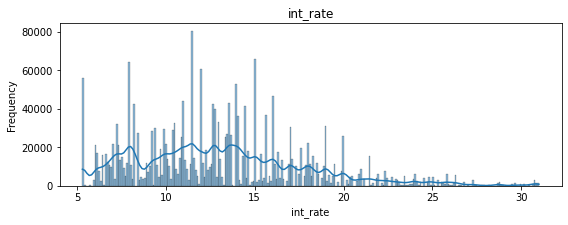

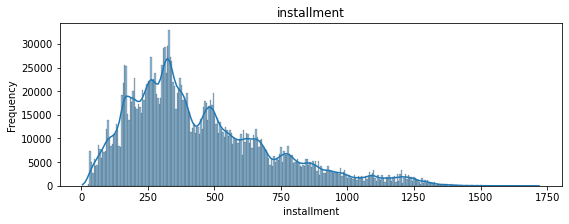

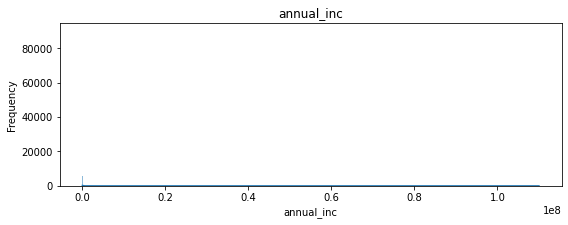

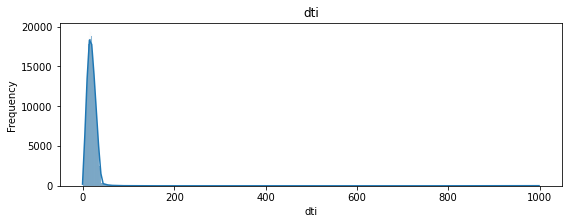

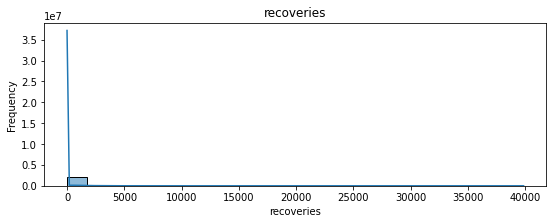

In [35]:
for c in numerical:
    plot_histogram(df,variable=c)
    plt.show()

In [36]:
df.describe()

,int_rate,installment,annual_inc,dti,recoveries
count,"2,260,668.00","2,260,668.00","2,260,664.00","2,258,957.00","2,260,668.00"
mean,13.09,445.81,"77,992.43",18.82,136.07
std,4.83,267.17,"112,696.20",14.18,725.83
min,5.31,4.93,0.00,-1.00,0.00
25%,9.49,251.65,"46,000.00",11.89,0.00
50%,12.62,377.99,"65,000.00",17.84,0.00
75%,15.99,593.32,"93,000.00",24.49,0.00
max,30.99,"1,719.83","110,000,000.00",999.00,"39,859.55"


##### Observation & to be checked: 
1. maximum **interest** rate is almost 31%, is it inline or is it too high (i.e in Poland might be too high)?  

2. **istallement** distribution looks ok at first glance,   

3. **annual income**: check outliers and missing values   

4. dti: why min value it is negative, check in detail the distribution, there are NA check why

5. recoveries: check how many of them were above 0

3. Annual income check

In [37]:
df['annual_inc'].quantile([0.8,0.85,0.9,0.95, 0.99])

0.80   100,000.00
0.85   114,000.00
0.90   130,000.00
0.95   160,000.00
0.99   270,000.00
Name: annual_inc, dtype: float64

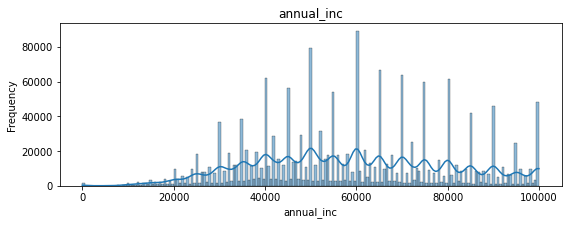

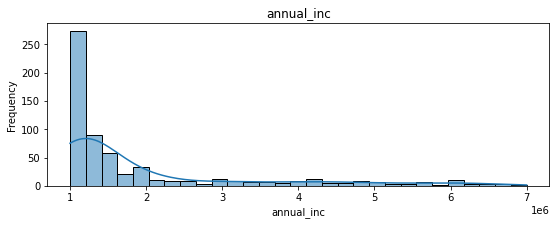

<module 'matplotlib.pyplot' from '/Users/aleksandram/.local/share/virtualenvs/PD-scoring-Yvrhi1rQ/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [38]:
plot_histogram(df[df['annual_inc']<=100000],variable='annual_inc')
# tendency in round ammounts -> risk typology 
# are high value customer risky? maybe any VIP target model?
plot_histogram(df[ (df['annual_inc']>=1000000)  & (df['annual_inc']<7000000) ],variable='annual_inc')


In [39]:
df[df['annual_inc']>270000].sort_values('annual_inc', ascending = False).head(50)
df['annual_inc'].value_counts().tail(30)
df[df['annual_inc'].isna()]

,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,recoveries,last_pymnt_d,application_type
2141934,36 months,7.43,155.38,A,A2,NONE,NaN,Aug-2007,Does not meet the credit policy. Status:Fully ...,1.00,NaN,0.00,Aug-2010,Individual
2141935,36 months,7.75,218.55,A,A3,NONE,NaN,Aug-2007,Does not meet the credit policy. Status:Fully ...,1.00,NaN,0.00,Aug-2010,Individual
2141965,36 months,7.75,209.18,A,A3,NONE,NaN,Jul-2007,Does not meet the credit policy. Status:Fully ...,1.00,NaN,0.00,Jul-2010,Individual
2142018,36 months,8.38,204.84,A,A5,NONE,NaN,Jun-2007,Does not meet the credit policy. Status:Fully ...,4.00,NaN,0.00,Jun-2010,Individual


In [40]:
#column I need -> total loan amount, start and end date, if laast payment equals end date, convert annual to monthly, compare dti
# if paid on time or not ? 


4. dti: why min value it is negative, check in detail the distribution, there are NA check why

In [41]:
df[df['dti']<0]


,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,recoveries,last_pymnt_d,application_type
723428,36 months,9.75,482.25,B,B3,MORTGAGE,"94,000.00",Mar-2016,Fully Paid,-1.00,Sep-2003,0.00,Feb-2017,Individual
1377778,60 months,13.49,391.08,C,C2,MORTGAGE,"75,000.00",Mar-2017,Fully Paid,-1.00,Sep-1992,0.00,Nov-2018,Joint App


In [ ]:
plot_histogram(df[df['dti']<=50],variable='dti')
#dti <40 is in distribution
df[df['dti']>300]


In [ ]:
df[df['dti'].isna()].count()
df[(df['annual_inc']==0) & (~df['dti'].isna())]
#annual inc is zero -> dti is zero something strange


4. Recoveries

In [ ]:
df[df['recoveries']>0].count()/df.shape[0]
# Only of total is recovered, calculate how many of default are recovered

In [ ]:
plot_histogram(df[df['recoveries']>0],variable='recoveries')
# smaller ammounts are recovered

### Categorical

df.head()

In [42]:
df.head()
dates = ['issue_d','earliest_cr_line','last_pymnt_d']

In [43]:
categorical = df.select_dtypes('object').columns
categorical = [c for c in categorical if c not in dates]


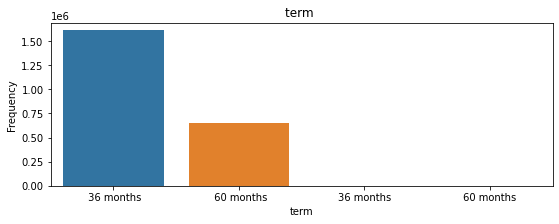

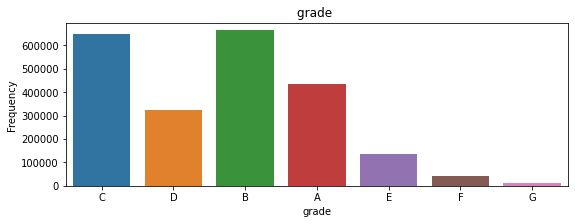

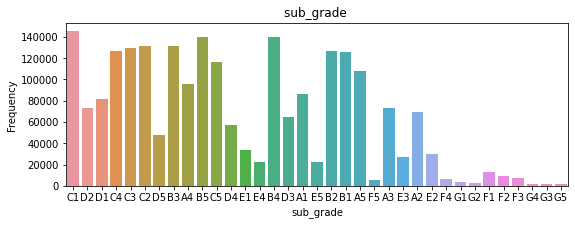

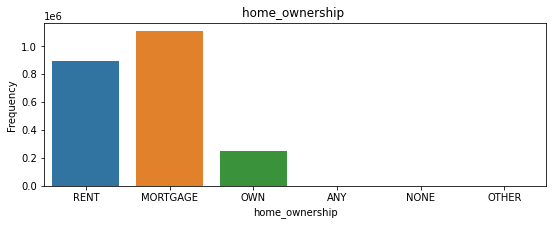

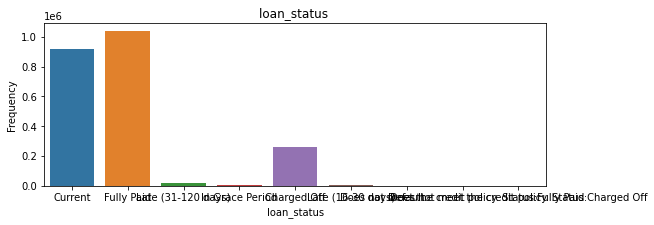

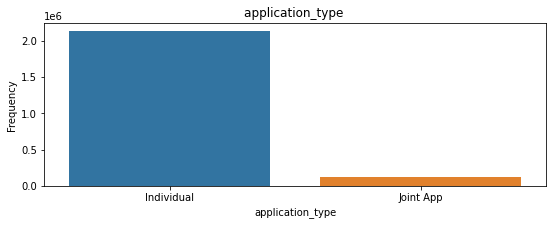

In [44]:
for c in categorical:
    plot_cnt(df,variable=c)
    plt.show()

In [45]:
df['loan_status'].value_counts()
df['term'].value_counts()
df['home_ownership'].value_counts()
df['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [46]:
#Missing data
df[categorical].isna().sum()
no_na

term                0
grade               0
sub_grade           0
home_ownership      0
loan_status         0
application_type    0
dtype: int64

### Dates

In [53]:
for d in dates:
    df[d] = pd.to_datetime(df[d],format='%b-%Y')

In [55]:
df[dates].describe()

/var/folders/sr/tjflkqq52pjfd8vs0fdwdpqc0000gn/T/ipykernel_9402/2537157461.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[dates].describe()
/var/folders/sr/tjflkqq52pjfd8vs0fdwdpqc0000gn/T/ipykernel_9402/2537157461.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[dates].describe()
/var/folders/sr/tjflkqq52pjfd8vs0fdwdpqc0000gn/T/ipykernel_9402/2537157461.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and a

,issue_d,earliest_cr_line,last_pymnt_d
count,2260668,2260639,2258242
unique,139,754,135
top,2016-03-01 00:00:00,2004-09-01 00:00:00,2019-02-01 00:00:00
freq,61992,15400,934725
first,2007-06-01 00:00:00,1933-03-01 00:00:00,2007-12-01 00:00:00
last,2018-12-01 00:00:00,2015-11-01 00:00:00,2019-02-01 00:00:00


In [58]:
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year

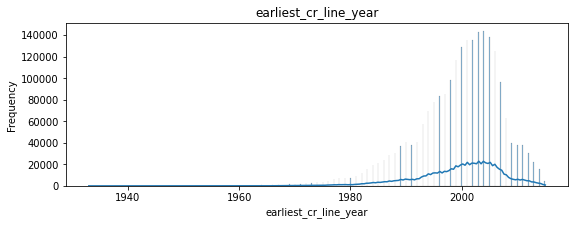

<module 'matplotlib.pyplot' from '/Users/aleksandram/.local/share/virtualenvs/PD-scoring-Yvrhi1rQ/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [59]:
plot_histogram(df,'earliest_cr_line_year')

In [ ]:
#earliest credit line 1930? 